# Teste 3 - 11/09/2018

## Disponibilização: 26/09/2018 - 11h
## Encerramento: 02/10/2018 - 18h

O objetivo deste terceiro projeto prático da disciplina Redes Neurais Artificias é produzir um Jupyter notebook para praticar o aprendizado de neurônios perceptron.

Esta tarefa é dividida em to-dos, isto é, pequenas atividades que devem ser cumpridas para que o objetivo geral seja alcançado. A cada to-do está associada uma célula do Jupyter Notebook, que deve ser preenchida com código Python atendendo ao que se pede.

- Kid Mendes de Oliveira Neto - 1615310011
- Wilson Calixto Cordovil Junior - 1515310026

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### To-Do 1

#### Conjunto de Treinamento
1. o conjunto de treinamento é composto pelos atributos preditores x1 e x2 e atributo alvo y.

In [43]:
X = [[-1,0,0],[-1,0,1],[-1,1,0],[-1,1,1]]

for i in range (len (X)):
    X[i] = np.asarray(X[i])

Y = [1,1,1,0]

### To-Do 2

#### Neurônio Perceptron

Implemente o aprendizado de um neurônio perceptron para o conjunto de treinamento X e rótulos Y relativos à função NAND. Seu algoritmo deve ilustrar claramente:

1. O vetor de pesos a cada época;
2. A quantidade de exemplos corretos e errados a cada época;
3. A quantidade de épocas até a convergência;
4. A quantidade de vezes em que houve ajuste no vetor de pesos.

In [56]:
class Perceptron:
    
    def __init__(self, X, Y, n=0.1):
        self.X = X
        self.Y = Y
        self.n = n
        self.n_attributes = len(X[0])
        self.W = []
    
    def train(self):
        
        n_seasons = 0
        n_weights_changed = 0
        
        for i in range(self.n_attributes):
            self.W.append(random.uniform(-0.5,0.5))
        
        print("Época: {}\nVetor de pesos: {}\n".format(n_seasons, self.W))
        
        while True:
            error = False
            right_answer = 0
            wrong_answer = 0
            
            for i in range(len(self.X)):
                u = 0
                
                for j in range(self.n_attributes):
                    u += self.X[i][j] * self.W[j]
                    
                y = 1 if u >= 0 else 0
                
                if(y != self.Y[i]):
                    error_aux = self.Y[i] - y
                    for j in range(self.n_attributes):
                        self.W[j] = self.W[j] + self.n*error_aux*self.X[i][j]
                        
                    error = True
                    wrong_answer += 1
                    n_weights_changed += 1
                else:
                    right_answer += 1
            
            n_seasons += 1
            print("Época: {}\nVetor de pesos: {}".format(n_seasons, self.W))
            print("Quantidade de exemplos corretos: {}\nQuantidade de exemplos errados: {}\n".format(right_answer, wrong_answer))
            
            if(not error):
                print("\nConvergência alcançada!")
                print("Vetor de pesos: {}\nQuantidade de épocas: {}\nQuantidade de vezes que houve ajuste no vetor de pesos: {}".format(self.W, n_seasons, n_weights_changed))
                break

In [63]:
perceptron = Perceptron(X,Y)
perceptron.train()

Época: 0
Vetor de pesos: [-0.20902570509829566, -0.018958089609365514, 0.3852472592860561]

Época: 1
Vetor de pesos: [-0.10902570509829565, -0.11895808960936552, 0.2852472592860561]
Quantidade de exemplos corretos: 3
Quantidade de exemplos errados: 1

Época: 2
Vetor de pesos: [-0.10902570509829565, -0.11895808960936552, 0.1852472592860561]
Quantidade de exemplos corretos: 2
Quantidade de exemplos errados: 2

Época: 3
Vetor de pesos: [-0.10902570509829565, -0.11895808960936552, 0.08524725928605609]
Quantidade de exemplos corretos: 2
Quantidade de exemplos errados: 2

Época: 4
Vetor de pesos: [-0.10902570509829565, -0.11895808960936552, -0.014752740713943918]
Quantidade de exemplos corretos: 2
Quantidade de exemplos errados: 2

Época: 5
Vetor de pesos: [-0.10902570509829565, -0.11895808960936552, -0.11475274071394392]
Quantidade de exemplos corretos: 2
Quantidade de exemplos errados: 2

Época: 6
Vetor de pesos: [-0.10902570509829565, -0.21895808960936552, -0.11475274071394392]
Quantidade

### To-Do 3

#### Visualizando a Fronteira de Decisão

Após o processo de aprendizado, tem-se que o neurônio aprendeu os valores corretos do
vetor de pesos capaz de separar adequadamente as classes deste exemplo. Para visualizar
a fronteira de decisão a partir deste vetor de 3 pesos, construa uma reta da seguinte forma:

            y = W[0]/W[2] − (W[1]/W[2]) ∗ x,
            
em que os pesos identificados são utilizados para obter a forma canônica da reta característica
da fronteira de decisão. Denote as classes em cores distintas, para facilitar a
visualização dos resultados. 

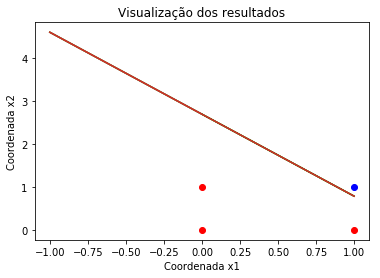

In [67]:
for i in range(len(X)):
    plt.plot(X[i][1], X[i][2], 'ro' if(Y[i] == 1) else 'bo')
    plt.plot(X[i], W[0]/W[2] - (W[1]/W[2])*X[i])

plt.title('Visualização dos resultados')
plt.xlabel('Coordenada x1')
plt.ylabel('Coordenada x2')
plt.show()

### To-Do 4

#### Funções de Ativação

Para complementar o entendimento para as próximas etapas da disciplina, apresente também gráficos para as seguintes funções de ativação, considerando o intervalo [−1.5, 1.5]:

1. Degrau (com θ = 0.5);
2. Sigmoidal, com 3 valores distintos de suavidade e centro da curva no valor 0;
3. Tangente Hiperbólica;
4. ReLU.

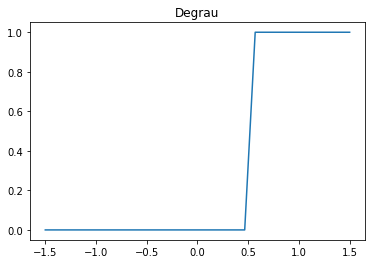

In [79]:
def step_value(num):
    return 1 if num >= 0.5 else 0

X = np.linspace(-1.5,1.5, 30)
Y = [step_value(x) for x in X]

plt.title('Degrau')
plt.plot(X, Y)
plt.show()

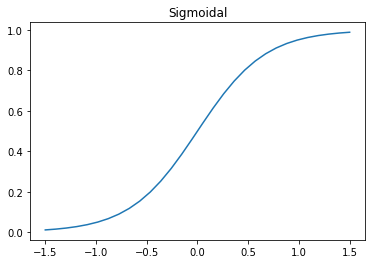

In [80]:
def sigmoid_value(num):
    return (1 /(1 + np.exp(-num)))

Y = [sigmoid_value(x*3) for x in X]

plt.title('Sigmoidal')
plt.plot(X, Y)
plt.show()

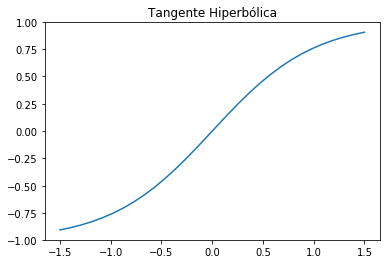

In [81]:
Y = [np.tanh(x) for x in X]

plt.title('Tangente Hiperbólica')
plt.plot(X, Y)
plt.show()

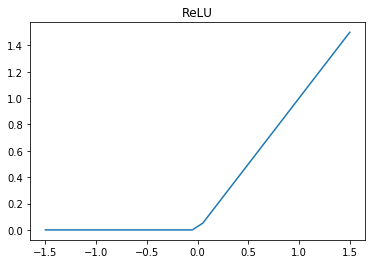

In [84]:
Y = np.maximum(X, 0)

plt.title('ReLU')
plt.plot(X, Y)
plt.show()